In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy
import cv2
import os
print("Module Imported")

Module Imported


In [6]:
train=ImageDataGenerator(rescale=1/125)
validation=ImageDataGenerator(rescale=1/125)

In [7]:
train_dataset=train.flow_from_directory('basedata/train/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('basedata/Validation/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                 ])

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
fitmodel=model.fit(train_dataset,steps_per_epoch=10,epochs=30,validation_data=validation_dataset)

Epoch 1/30
10/10 [==============================] - 5s 422ms/step - loss: 3.6453 - accuracy: 0.5000 - val_loss: 0.5665 - val_accuracy: 0.7667
Epoch 2/30
10/10 [==============================] - 3s 340ms/step - loss: 1.0083 - accuracy: 0.6000 - val_loss: 0.4853 - val_accuracy: 0.9667
Epoch 3/30
10/10 [==============================] - 3s 337ms/step - loss: 0.5130 - accuracy: 0.7667 - val_loss: 0.9050 - val_accuracy: 0.6667
Epoch 4/30
10/10 [==============================] - 3s 341ms/step - loss: 0.5852 - accuracy: 0.8000 - val_loss: 0.1532 - val_accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - 3s 337ms/step - loss: 0.2057 - accuracy: 0.9333 - val_loss: 0.2059 - val_accuracy: 0.9000
Epoch 6/30
10/10 [==============================] - 3s 340ms/step - loss: 0.4254 - accuracy: 0.9000 - val_loss: 0.1633 - val_accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - 3s 341ms/step - loss: 0.1248 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9667
Epoch 

Image 1 saved at captured_images\image_1.jpg
Image 2 saved at captured_images\image_2.jpg
Image 3 saved at captured_images\image_3.jpg
Image 4 saved at captured_images\image_4.jpg
Image 5 saved at captured_images\image_5.jpg
captured_images/image_1.jpg
1/1 [==============================] - 0s 47ms/step
This is dog
captured_images/image_2.jpg
1/1 [==============================] - 0s 37ms/step
This is dog
captured_images/image_3.jpg
1/1 [==============================] - 0s 38ms/step
This is dog
captured_images/image_4.jpg
1/1 [==============================] - 0s 60ms/step
This is dog
captured_images/image_5.jpg
1/1 [==============================] - 0s 44ms/step
This is dog


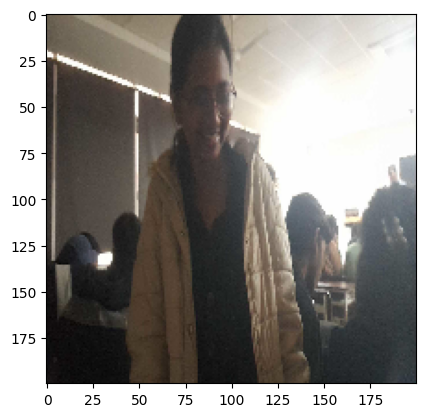

In [21]:

def capture_and_save_images(output_dir, num_images=10):
   
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    camera='http://192.168.147.187:8080/video'
    cap = cv2.VideoCapture(camera)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        exit()

   
    for i in range(num_images):
      
        ret, frame = cap.read()

        # If the frame is read successfully, save it as a JPEG file
        if ret:
            image_path = os.path.join(output_dir, f'image_{i + 1}.jpg')
            cv2.imwrite(image_path, frame)
            print(f"Image {i + 1} saved at {image_path}")

        # Pause for a short time (you can adjust the time if needed)
        cv2.waitKey(500)

    # Release the webcam
    cap.release()

# Specify the output directory for saving images
output_directory = 'captured_images'

# Number of images to capture and save
num_images_to_capture = 5

# Call the function to capture and save images
capture_and_save_images(output_directory, num_images_to_capture) 



def get_image_paths(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    image_paths = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Check if the file has an image extension
        if any(file_path.lower().endswith(ext) for ext in image_extensions):
            image_paths.append(file_path)

    return image_paths

# Specify the directory containing images
image_directory = 'captured_images/'

# Get the list of image paths in the directory
image_paths = get_image_paths(image_directory)

# Print the image paths





for path in image_paths:
    print(path)
    img=image.load_img(path,target_size=(200,200))
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    plt.imshow(img)
    if(val==0):
        print("This is dog")
    else:
        print("This is person")
    
    